In [2]:

import pandas as pd
# Loading the dataset
file = pd.read_csv('Dataset\Python Programming Questions Dataset.csv')

# Displaying first few rows
file.head()

Instruction  \
0  Write a function to find squares of individual...   
1  Create a function in Python which takes a list...   
2  Design a function in Python that sorts a list ...   
3  Develop a greedy strategy in Python to find th...   
4  Write a Python program to create a singly link...   

                        Input  \
0                         NaN   
1                   [3, 4, 5]   
2  ['red', 'green', 'orange']   
3                         NaN   
4                         NaN   

                                              Output  
0  def square_nums(nums):\r\n square_nums = list(...  
1  def sum_squares(nums):\n    result = 0\n    fo...  
2  def sort_list_alphabetically(input_list): \n  ...  
3  def min_cost(points):\n    points.sort()  # so...  
4  class Node():\n  def __init__(self, data):\n  ...

In [3]:
# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud


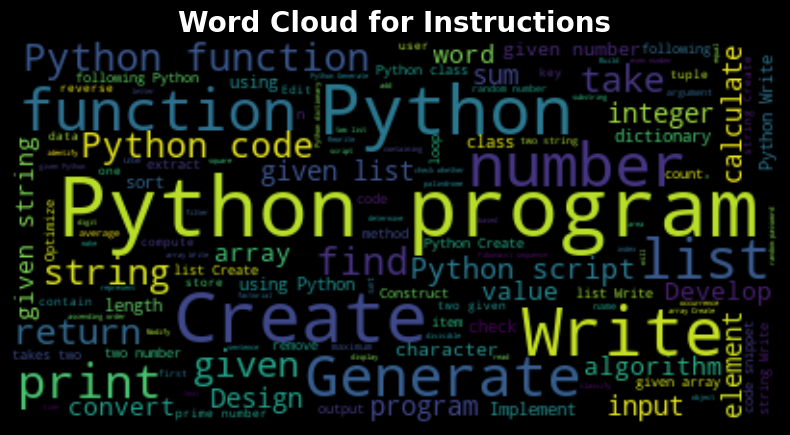

In [4]:
# Word Cloud for 'Instruction' column (Generates a word cloud visualizing the most frequently occurring words)
wordcloud = WordCloud().generate(' '.join(file['Instruction']))

# The figure size is set to 10x5 inches, and the background color is black.
plt.figure(figsize = (10, 5), facecolor = 'black')

# The interpolation method used for displaying the word cloud is 'bilinear', providing a smooth visual appearance.
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# Customizing the title
plt.title('Word Cloud for Instructions', fontsize = 20, fontweight = 'bold', color = 'white')
plt.show()

In [5]:
#Defining a text template for consistency and readablility
template = 'Instruction\n{}\n\nInput\n{}\n\nResponse\n{}'

In [6]:
# Creating formatted data (only 2000 out of 13000+ rows)
data = file.apply(lambda row : template.format(row.Instruction, row.Input, row.Output), axis = 1)[:]

In [7]:
# Printing first row
print(data[0])

Instruction
Write a function to find squares of individual elements in a list using lambda function.

Input
nan

Response
def square_nums(nums):
 square_nums = list(map(lambda x: x ** 2, nums))
 return square_nums


In [15]:
from dotenv import load_dotenv
import os
from langchain_community.llms import Ollama
from langchain_openai.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate,ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.runnables import RunnablePassthrough, RunnableParallel


In [9]:
ollama_llm = Ollama(model="llama3")

In [18]:
load_dotenv()
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
# API_KEY = os.getenv('OPENAI_API_KEY')
# Model = 'gpt-3.5-turbo'
# gpt_llm = ChatOpenAI(api_key=API_KEY,model=Model)

In [11]:
ollama_llm.invoke('what is a bot')

"A bot (short for robot) is a software program that automates repetitive or time-consuming tasks, interacts with users through text or voice commands, or performs specific functions on the internet. In the context of computing and artificial intelligence, a bot can be:\n\n1. **Chatbot**: A computer program that simulates human-like conversations with humans, typically through text-based interactions (e.g., messaging apps, forums, or websites).\n2. **Web scraper**: A bot that extracts specific data from websites, such as prices, reviews, or news articles.\n3. **Social media bot**: A program that automates social media tasks, like posting updates, responding to comments, or monitoring keywords.\n4. **Virtual assistant**: A bot that assists humans with everyday tasks, such as scheduling appointments, setting reminders, or providing information.\n5. **Game bot**: A program that plays games on behalf of a human player, often using pre-programmed strategies or adapting to game conditions.\n\

In [12]:
# #os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
# os.environ["LANGCHAIN_TRACING_V2"]="true"
# os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")

In [16]:
prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are a coding assistant for python interview questions. Please respond by giving them code accordingly"),
        ("user","Question:{question}")
    ]
)

### Streamlit Framework

In [17]:
import streamlit as st

In [19]:
st.title("Langchain Demo with LLAMA3")
input_text=st.text_input("Kindly give the question to solve: ")

2024-05-08 21:27:45.598 
  command:

    streamlit run c:\Users\anura\anaconda3\envs\genai\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-08 21:27:45.600 Session state does not function when running a script without `streamlit run`


In [20]:
ollama_llm = Ollama(model="llama3")
parser = StrOutputParser()
chain = prompt|ollama_llm|parser
# chain.invoke('what is a bot')

In [21]:
if input_text:
    st.write(chain.invoke({"question":input_text}))

In [ ]:
# loader = TextLoader('Dataset\Python Programming Questions Dataset.csv')
# document = loader.load()

In [ ]:
# document

[Document(page_content='Instruction,Input,Output\nWrite a function to find squares of individual elements in a list using lambda function.,,"def square_nums(nums):\n square_nums = list(map(lambda x: x ** 2, nums))\n return square_nums"\nCreate a function in Python which takes a list of numbers and returns the sum of squares of those numbers.,"[3, 4, 5]","def sum_squares(nums):\n    result = 0\n    for num in nums:\n        result += num*num\n    \n    return result\n\nnums = [3, 4, 5]\n\nresult = sum_squares(nums)\nprint(result)"\nDesign a function in Python that sorts a list of strings in alphabetical order.,"[\'red\', \'green\', \'orange\']","def sort_list_alphabetically(input_list): \n    output_list = sorted(input_list) \n    return output_list \n  \ninput_list = [\'red\', \'green\', \'orange\']\nsorted_list = sort_list_alphabetically(input_list) \nprint(""Sorted List in Alphabetical Order:"", sorted_list)"\nDevelop a greedy strategy in Python to find the minimum total cost of conn

In [ ]:
# splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=50)
# chunks = splitter.split_documents(document)


In [ ]:
# chunks[3]

Document(page_content='square_nums = list(map(lambda x: x ** 2, nums))\n return square_nums"', metadata={'source': 'Dataset\\Python Programming Questions Dataset.csv'})

In [ ]:
# !pip install langchain


In [ ]:
# from langchain.llama import LangChain
# from ollama.vector_storage import FAISS

# # Load LLaMA 3 model
# ollama_llmembd = LangChain("llama3")

# # Your code for splitting documents goes here
# # Assuming chunks is your list of documents obtained from splitting

# # Generate embeddings for each chunk
# embeddings = [ollama_llmembd.vectorize(chunk) for chunk in chunks]

# # Create FAISS index from the embeddings
# vector_storage = FAISS.from_embeddings(embeddings)
# retriever = vector_storage.as_retriever()


ModuleNotFoundError: No module named 'langchain.llama'

In [ ]:
# # Generate embeddings for each chunk
# embeddings = [ollama_llm.vectorize(chunk) for chunk in chunks]

# # Create FAISS index from the embeddings
# vector_storage = FAISS.from_documents(chunks, embeddings)
# retriever = vector_storage.as_retriever()

AttributeError: 'Ollama' object has no attribute 'vectorize'